(-4.058631209647063, 4.117395258804836, -4.309480492130218, 5.167561533094499)

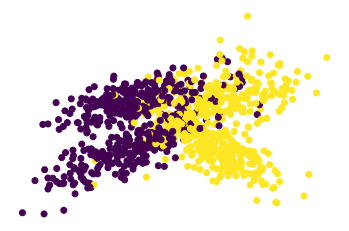

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

np.random.seed(42)
X, y = make_classification(n_samples=100000, n_features=2, n_informative=2, n_redundant=0)
n_train_samples = 1000

X_train, y_train = X[:n_train_samples], y[:n_train_samples]
X_test, y_test = X[n_train_samples:], y[n_train_samples:]


plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.axis('off')

In [2]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

# For binary classification tasks predict_proba returns a matrix containing the first class proba in the first entry,
# and the second class proba in the second entry. Since there are only two classes one is just 1 - n of the other.
# The calibration_curve implementation expects just one of these classes in an array, so we index that.
y_test_predict_proba = clf.predict_proba(X_test)[:, 1]

from sklearn.calibration import calibration_curve
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)

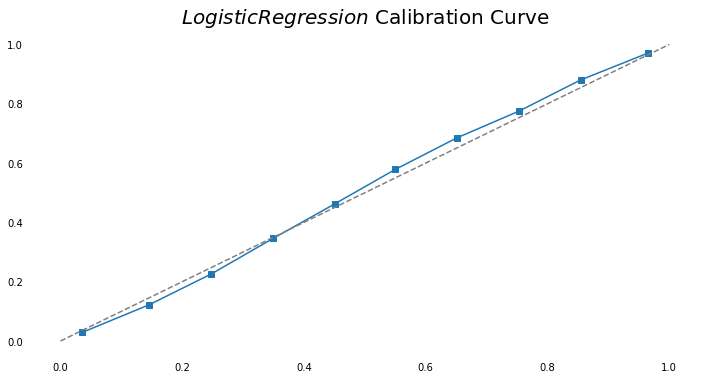

In [3]:
import seaborn as sns

fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(mean_predicted_value, fraction_of_positives, 's-')
plt.plot([0, 1], [0, 1], '--', color='gray')

sns.despine(left=True, bottom=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.title("$LogisticRegression$ Calibration Curve", fontsize=20); pass

In [10]:
import xgboost as xgb
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

params = {
        'objective': 'binary:logistic', 
}
model = xgb.train(params, dtrain = dtrain)

In [24]:
y_train_predict_proba = model.predict(dtrain)
y_test_predict_proba = model.predict(dtest)
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)

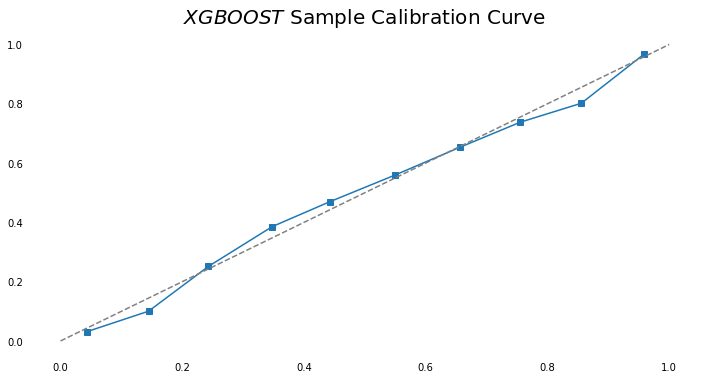

In [25]:
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(mean_predicted_value, fraction_of_positives, 's-')
plt.plot([0, 1], [0, 1], '--', color='gray')

sns.despine(left=True, bottom=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.title("$XGBOOST$ Sample Calibration Curve", fontsize=20); pass

<AxesSubplot:ylabel='Count'>

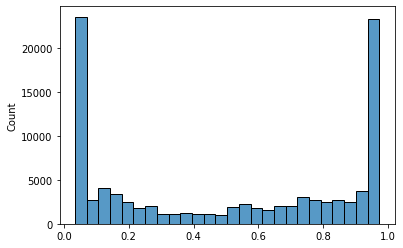

In [32]:
sns.histplot(y_test_predict_proba)

<AxesSubplot:ylabel='Count'>

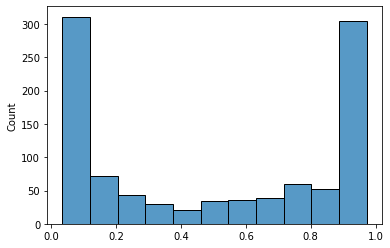

In [33]:
sns.histplot(y_train_predict_proba)